# Notebook 3 - NumPy
[NumPy](http://numpy.org) short for Numerical Python, has long been a cornerstone of numerical computing on Python. It provides the data structures, algorithms and the glue needed for most scientific applications involving numerical data in Python. All computation is done in vectorised form - using vectors of several values at once instead of singular values at a time. NumPy contains, among other thigs:
* A fast and efficient multidimensional array object `ndarray`.
* Mathematical functions for performing element-wise computations with arrays or mathematical operations between arrays.
* Tools for reading and manipulating large array data to disk and working with memory-mapped files.
* Linear algebra, random number generation and Fourier transform capabilities.

For the rest of the course, whenever array is mentioned it refers to the NumPy ndarray.
<br>

## Table of contents
- [The ndarray](#ndarray)
    - [Creating arrays](#creating)
    - [Data Types](#data)
    - [Arithmetic Operations](#arithmetic)
    - [Indexing and Slicing](#indexing)
    - [Transposing and Swapping Axis](#transposing)
- [Universal Functinos](#universal)
- [Other useful operations](#other)
- [File IO](#file)
- [Liear algebra](#linear)

# Why NumPy?
Is the first question that anybody asks when they find out about it. 

Some people might say: *I don't care about speed, I want to spend my time researching how to cure cancer, not optimise coputer code!*

That's perfectly reasonable, but are you willing to wait a lot more for your experiment to finish? I definiately don't want to do that. Let's see how much faster NumPy really is!

to show that we'll be using the magic command `%timeit` which you can read more about [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html) and don't worry about the details now, they will clear up later.

Let's have a look at generating a vector of 10M random values and then summing them all up using the Python way and using the NumPy way!

In [1]:
import numpy as np

x = np.random.randn(10000000) # generate random numbers

print("Running normal python sum()")
%timeit sum(x)

print("Running numpy sum()")
%timeit np.sum(x)

Running normal python sum()
1.06 s ± 23.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Running numpy sum()
5.69 ms ± 139 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**WOW** that was a difference of more than a **100 times** and that was just for a single summing operation. Imagine if you had several of those running all the time!

Are you onboard with Numpy then? Let's proceed..

# The ndarray <a name="ndarray"></a>
The ndarray is a backbone on Numpy. It's a fast and flexible container for N-dimensional array objects, usually used for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

Here is a quick example of its capabilities:

In [13]:
import numpy as np

# create a 2x3 array of random values
data = np.random.randn(2,3)
data


array([[-0.89773768, -1.07022593,  0.74693362],
       [ 0.99732998, -1.32006226, -0.34400101]])

In [3]:
data * 10 #multiply all numbers by 10

array([[ -3.8472688 ,   8.65526841, -11.15924237],
       [-12.46563787,  -0.92758844,  -4.13904629]])

In [4]:
data + data #element-wise addition

array([[-0.76945376,  1.73105368, -2.23184847],
       [-2.49312757, -0.18551769, -0.82780926]])

Every array has a shape, a tuple indicating the size of each dimnesion and a dtype. You can obtain these via the respective methods:

In [5]:
# number of dimensions of the array
data.ndim

2

In [6]:
# the size of the array
data.shape

(2, 3)

In [7]:
# the type of values store in the array
data.dtype

dtype('float64')

## Creating arrays <a name="creating"></a>
The easiest and quickest way to create an array is from a normal Python list.

In [11]:
data = [1.2, 5.2, 5, 7.8, 0.3]
arr = np.array(data)

arr

array([1.2, 5.2, 5. , 7.8, 0.3])

It is also possible to create multidimensional arrays in a similar fashion. An example would be:
```python
data = [[1.2, 5.2, 5, 7.8, 0.3],
        [4.1, 7.2, 4.8, 0.1, 7.7]]
```
Try creating an multidimensional array below and verify its number of dimensions

In [17]:
ident = [[1, 0, 3], [0, 1, 4], [6, 8, 5]]
idarray = np.array(ident)

print(idarray)

idarray.ndim

[[1 0 3]
 [0 1 4]
 [6 8 5]]


2

We can also create an array filled with zeros

In [18]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Again, it is also possible to create a multidimensional array by passing a tuple as an argument

In [19]:
np.zeros((4,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

Another option is to use the `empty()` function which creates an array filled with garbage values. It is used in a similar way to `zeros()`.

Try using it below and see what it creates!

In [20]:
np.empty((10, 10))

array([[-3.10503618e+231, -3.10503618e+231,  2.25361685e-314,
         2.25363725e-314,  2.25363726e-314,  1.30376635e-284,
         0.00000000e+000,  3.95252517e-323, -7.88764273e+303,
        -1.12523955e+027],
       [ 2.25169233e-314,  2.22599396e-314, -1.10016133e-116,
         2.24355478e-314,  2.25065473e-314,  1.31464388e-255,
         2.25169236e-314,  2.25168223e-314, -2.96767594e+104,
         2.23429015e-314],
       [ 2.22599404e-314, -1.26029776e-131,  2.22747477e-314,
         2.22579514e-314,  6.19803637e-026,  2.25169239e-314,
         2.22599508e-314,  1.42990280e+049,  2.25168229e-314,
         2.22664477e-314],
       [-1.29265553e-187,  2.25168232e-314,  2.22664474e-314,
        -1.31538591e+022,  2.22928397e-314,  2.22702941e-314,
        -3.99908744e+005,  2.22841920e-314,  2.22584458e-314,
         8.82923996e-229],
       [ 2.23551304e-314,  2.22579514e-314,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000

NumPy also has an equivalent to the built-in Python function `range()`

In [26]:
np.asarray([1, 1, 1])

array([1, 1, 1])

Here are most of the possible ways of creating an array

| Function | Description |
|----|:--|
| array  | Convert input data to an ndarray either by inferring a dtype<br>or explicitly specifying a dtype; copies the input data by default. |
| asarray | Convert input to ndarray, but do not copy if the input is already an ndarray. |
| arange | Similar to the built-in `range` function but returns an ndarray. |
| ones | Produces an array of all 1s with the given shape and dtype. |
| ones_like | Similar to `ones` but takes another array and produces a ones array<br>of the same shape and dtype |
| zeros, zeros_like | Similar to `ones` but produces an array of 0s. |
| empty, emtpy_like | Create new array by allocating memory but without populating any values. |
| full, full_like | Produce an array of a given shape and dtype with all values set to the indicated "fill value". |
| eye | Create a square NxN identity matrix (1s on the diagonal and 0s elsewhere). |

## Data Types <a name="data"></a>
The data type or `dtype` is a special object containing the information the array needs to interpret a chunk of memory. We can specify it during the creation of an array 

In [22]:
arr = np.array([1, 2, 3], dtype=np.float64)

In [23]:
arr.dtype

dtype('float64')

dtypes are a source of NumPy's flexibility. Here is a table of all of them.
There is no need to remember all of dtypes.

| Type | Type code | Description |
|----|---|---|
| int8, uint8 | i1, u1 | Signed and unsigned 8bit integer |
| int16, uint16 | i2, u2 | Signed and unsigned 16bit integer |
| int32, uint32 | i4, u4 | Signed and unsigned 32bit integer |
| int64, uint64 | i8, u8 | Signed and unsigned 64bit integer |
| float16 | f2 | Half-precision floating point |
| float32 | f4 or f | Standard single-precision floating point |
| float64 | f8 or d | Standard double-precision floating point |
| float128 | f16 or g | Extended-precision floating point |
| complex64<br>complex128<br>complex256 | c8, c16, c32 | Complex numbers represented by two 32, 64 or 128 floats, respectively |
| bool | ? | Boolean type storing True or False |
| object | O | Python object type, a value can be any Python object |
| string_ | S | Fixed-length ASCII string type.<br>For example use `S10` to create a string dtype with length 10 |
| unicode_ | U | Fixed-length Unicode type |




Similar to normal Python, you can cast(convert) an array from one dtype to another using the `astype` method:

In [31]:
arr = np.array([1, 2, 3])
arr.dtype


ident = [[1, 0, 3], [0, 1, 4], [6, 8, 5]]
idarray = np.array(ident)

print(idarray)

idarray.ndim

dtype('int64')

The normal limitations to casting apply here as well. You can try creating a `float64` array and then converting it to an `int64` array below 

### Exercise 1
Create a 5x5 [identity matrix](https://en.wikipedia.org/wiki/Identity_matrix). Then convert it to float64 dtype. At the end confirm its properties using the appropriate attributes.

In [51]:
# This is just for a generic array with random numbers

ori = [[1, 2, 3, 4, 5], [11, 12, 13, 14, 15], [21, 22, 23, 24, 25],
      [31, 32, 33, 34, 35], [41, 42, 43, 44, 45]]
ori_array = np.array(ori)

print(ori_array)

print("The type of the original array is: ", arr_array.dtype)

conv_array = ori_array.astype("float64")

print("The type of the conveted array is: ", conv_array.dtype)


[[ 1  2  3  4  5]
 [11 12 13 14 15]
 [21 22 23 24 25]
 [31 32 33 34 35]
 [41 42 43 44 45]]
The type of the original array is:  int64
The type of the conveted array is:  float64


In [52]:
# An identity array actually has 1's on its diagonal and 0's elsewhere
# You create that with "eye"

alt_array = np.eye(5)
print(alt_array)

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


## Arithmetic operations <a name="arithmetic"></a>
You have already gotten a taste of this in the examples above but let's try to extend that.

Arrays are important because they enable you to express batch operations on data without having to write for loops - this is called **vectorisation**.

Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [60]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
A * A

array([[ 1,  4,  9],
       [16, 25, 36]])

In [55]:
A - A

array([[0, 0, 0],
       [0, 0, 0]])

Arithmetic operations with scalars propogate the scalar argument to each element in the array:

In [56]:
A * 5

array([[ 5, 10, 15],
       [20, 25, 30]])

In [57]:
A ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

Comparisons between arrays of the same size yield boolean arrays:

In [58]:
B = np.array([[1, 7, 4],[4, 12, 2]])
B

array([[ 1,  7,  4],
       [ 4, 12,  2]])

In [61]:
A > B

array([[False, False, False],
       [False, False,  True]])

Arithmetic operations with differently sized arrays is called **broadcasting** but will not be covered in this course due to the limited time.

### Exercise 2
Generate a vector of size 10 with values ranging from 0 to 1, both included.

In [65]:
# Using normal base Python

vector = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

vector


[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [75]:
# A smarter way to do so 

smart = np.arange(0, 1.1, 0.1)

smart

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [77]:
# Another alternative

alt = (np.arange(11))/10

alt

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

## Indexing and slicing <a name="indexing"></a>
NumPy offers many options for indexing and slicing. Coincidentally, they are very similar to Python.

Let's see how this is done in 1D:

In [71]:
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [78]:
A[5]

5

In [79]:
A[5:8]

array([5, 6, 7])

In [ ]:
A[5:8] = 0
A

**Important:** Unlike vanilla Python, NumPy array slices are views on the original array. This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [80]:
A_slice = A[5:8]
A_slice

array([5, 6, 7])

In [81]:
A_slice[:] = [12, 17, 24]
A

array([ 0,  1,  2,  3,  4, 12, 17, 24,  8,  9])

Here we used the [:] operator which assings to all values in the array.
Let's now have a look at higher dimensional arrays:

In [82]:
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Now that we have 2 dimensions, we need to input 2 indices to get a specific element of the array. Alternatively, if we input only one index, then we obtain the whole row of the array:

In [83]:
C[2]

array([7, 8, 9])

In [89]:
C[2][1]

8

In [90]:
C[2, 1]

8

Here is a picture to better explain indexing in 2D:
<img src="img/ndarray.png" alt="drawing" width="300"/>

The same concepts and techniques are extended into multidimensional arrays:
if you omit later indices, the returned object will be a lower dimensional ndarray consisting of all data along the higher dimensions.

Now let's look into **slicing**. You already saw above that slicing in 1D is done the same way as in standard Python data structures. So how do we do that in 2D? Well, it is fairly intuitive:

In [91]:
C = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
C

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [92]:
C[:2]

array([[1, 2, 3],
       [4, 5, 6]])

This can be read as *select the first 2 rows of C*

In [93]:
C[1, :2]

array([4, 5])

In [94]:
C[:, :1]

array([[1],
       [4],
       [7]])

Here is some visual aid for what happened above:
<img src="img/indexing.png" alt="drawing" width="400"/>

It is also possible to index arrays via booleans.

Say we have an 1D array of 0s and 1s and then a 2D array of randomly generated data:

In [95]:
fruits = np.array(["banana", "orange", "mango", "banana", "tomato", "passionfruit", "cherry"])
fruits

array(['banana', 'orange', 'mango', 'banana', 'tomato', 'passionfruit',
       'cherry'], dtype='<U12')

In [96]:
data = np.random.randn(7,4)
data

array([[-1.305729  , -0.17743578, -1.01987658,  0.14257937],
       [ 0.03293328,  0.39972587,  1.25507454, -0.12701468],
       [-1.16065751,  1.33419335, -0.34457093,  0.97432718],
       [-0.89892204,  0.92899116,  0.69850316,  0.08050524],
       [-1.35153887,  0.5440071 ,  0.37502612,  0.57550124],
       [ 1.09354576, -0.64712536, -0.37307286,  0.268422  ],
       [ 1.49440128,  1.35090044,  0.95098422, -0.72845718]])

In [97]:
fruits == "banana"

array([ True, False, False,  True, False, False, False])

In [98]:
data[fruits == "banana"]

array([[-1.305729  , -0.17743578, -1.01987658,  0.14257937],
       [-0.89892204,  0.92899116,  0.69850316,  0.08050524]])

Powerful right? The only caveat is that the boolean array must be of the same length as the array axis it's indexing. Caution must be taken here as the boolean selection will not fail even if the boolean array is not the correct length!

You can also mix and match boolean arrays but there is one small difference compared to Python - the typical boolean operators (`and` and `or`) do not work instead you must use `&`(and) and `|`(or).

In [ ]:
mask = (fruits == "banana") | (fruits == "cherry")
data[mask]

### Exercise 3
Create a 5x5 matrix of random values. Square all positive values of the matrix and set all else to 0. Attempt to do this in place - ie. without copying the matrix

In [122]:
rand = np.random.randn(5, 5)

np.square(rand[rand > 0])
rand[rand < 0] = 0

rand

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00831131, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.91918455, 0.        , 0.        ],
       [0.56608628, 0.26633755, 1.16523037, 0.        , 0.        ],
       [0.        , 0.41616831, 0.        , 0.25237893, 0.        ]])

### Exercise 4
Create a 2D array with 1s on the border and 0s inside

In [147]:
four = np.zeros((5,5))

four[0] = 1
four[4] = 1
four[:, :1] = 1
four[:, -1:] = 1

four

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

## Transposing Arrays and Swapping Axes <a name="transposing"></a>
We can use the method `reshape()` to convert the data from one shape into another. Later we can use the `T` attribute to obtain the transpose of the array.

In [148]:
A = np.arange(15)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [149]:
B = A.reshape((3,5))
B

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [150]:
B.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

We can also reshape 3D arrays but how would `T` work then? Luckily, we can use the `tranpose()` method which allows us to chose the axes we want to swap:

In [165]:
A = np.arange(16)
C = A.reshape((2, 2, 4))
print(C.shape)

C

(2, 2, 4)


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [166]:
C.transpose((1, 0, 2))
C.shape

C

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

## Plotting
You can easily plot and show images in Python via the package `matplotlib` which can be used to plot an array. 

First we have to set up our environment. Read and run the code below to do just that:

In [7]:
%matplotlib inline

# Import NumPy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Set a greyscale colourmap (we want white for 0 and black for 1)
fig = plt.set_cmap('Greys')

<Figure size 432x288 with 0 Axes>

Now we can create an array of values and plot in a canvas. The easiest way to do this is to pick values between 0 and 1 and plot grayscale images where 1 corresponds to black and 0 corresponds to white. Let's see how we can do this by creating an array of 0s:

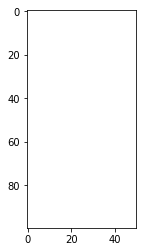

In [8]:
canvas = np.zeros((100,50))
plt.imshow(canvas, interpolation="none")

All is white right? let's add some black to it!

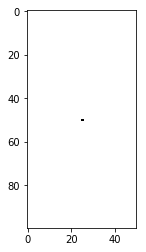

In [9]:
canvas[50, 25] = 1
plt.imshow(canvas, interpolation="none")

### Exercise 5
Use the canvas template above and create an image where the top right and bottom left pixels are set to black.

*Note: Remember to first reset your canvas to only 0s*

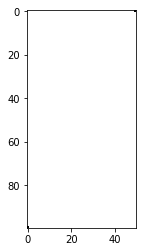

In [26]:
canvas = np.zeros((100,50))
canvas[0, 49] = 1
canvas[99, 0] = 1
plt.imshow(canvas, interpolation = "none")


### Exercise 6
Draw a horizontal and vertical line across the canvas

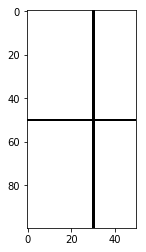

In [22]:
canvas = np.zeros((100,50))
canvas[:, 30] = 1
canvas[50, :] = 1
plt.imshow(canvas, interpolation = "none")

### Exercise 7
Make the top left corner of the image black.

*Extra challenge: do this wihtout using numbers for indexing*

50 25


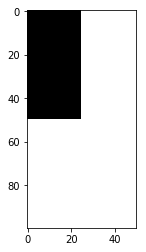

In [40]:
canvas = np.zeros((100, 50))
x, y = canvas.shape
x = int(x/2)
y = int(y/2)
print(x, y)
canvas[:x, :y] = 1
plt.imshow(canvas, interpolation = "none")


## Universal Functions <a name="universal"></a>
or *ufunc* are functions that perform element-wise operations on data in ndarrays. You can think of them as fast vectorised wrappers for simply functions. Here is an example of `sqrt` and `exp`:

In [51]:
A = np.arange(10)
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
np.sqrt(A)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [43]:
np.exp(A)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

Other universal functions take 2 arrays as input. These are called *binary* functions.

For example `maximum()` compares each value in array 1 vs the corresponding value in array 2, and then creates a new array with the higher of the two values. 

In [54]:
x = np.random.randn(10)
y = np.random.randn(10)
print(x, y)
np.maximum(x, y)

# This is in contrast to just max(x) which would show you the max value of the x array

[-0.13094219 -0.411209   -1.15260121 -0.37067115 -0.14490173  0.96404608
  1.98552401 -1.33900992  0.70720927  1.82895324] [ 0.21793424 -0.1656879   0.07533102 -1.14716865  0.17842727 -0.46783651
 -0.88450195  0.50647502  1.09892963  1.51374478]


array([ 0.21793424, -0.1656879 ,  0.07533102, -0.37067115,  0.17842727,
        0.96404608,  1.98552401,  0.50647502,  1.09892963,  1.82895324])

Other functions can return multiple arrays:

In [55]:
A = np.random.randn(10)
A

array([-0.59502216,  1.23672713,  0.13465844, -0.38395512, -0.60963978,
        0.52194805,  1.02421168, -0.63845716,  0.35589328, -0.15586385])

In [56]:
remainder, whole = np.modf(A)
print(remainder)
print(whole)

[-0.59502216  0.23672713  0.13465844 -0.38395512 -0.60963978  0.52194805
  0.02421168 -0.63845716  0.35589328 -0.15586385]
[-0.  1.  0. -0. -0.  0.  1. -0.  0. -0.]


Here is a list of most *ufuncs* in NumyPy:
*again, you don't need to memorise them. This is just a reference*
### Unary functions (accept one argument)

| Function | Description |
|----|----|
| abs, fabs | Compute the absolute value element-wise for integer, floating point, or complex values.<br>Use fabs as a faster alternative for non-complex-valued data |
| sqrt | Compute the square root of each element. Equivalent to arr ** 0.5 |
| square | Compute the square of each element. Equivalent to arr ** 2 |
| exp | Compute the exponent ex of each element |
| log, log10, log2, log1p | Natural logarithm (base e), log base 10, log base 2, and log(1 + x), respectively |
| sign | Compute the sign of each element: 1 (positive), 0 (zero), or -1 (negative) |
| ceil | Compute the ceiling of each element, i.e. the smallest integer greater than or equal to each element |
| floor | Compute the floor of each element, i.e. the largest integer less than or equal to each element |
| rint | Round elements to the nearest integer, preserving the dtype |
| modf | Return fractional and integral parts of array as separate array |
| isnan | Return boolean array indicating whether each value is NaN (Not a Number) |
| isfinite, isinf | Return boolean array indicating whether each element is finite (non-inf, non-NaN) or infinite, respectively |
| cos, cosh, sin, sinh, tan, tanh | Regular and hyperbolic trigonometric functions |
|  arccos, arccosh, arcsin,<br>arcsinh, arctan, arctanh | Inverse trigonometric functions |
| logical_not | Compute truth value of not x element-wise. Equivalent to -arr. |

### Binary functions (accept 2 arguments)
| Functions | Description |
| ---- | ---- |
| add | Add corresponding elements in arrays |
| subtract | Subtract elements in second array from first array |
| multiply | Multiply array elements |
| divide, floor_divide | Divide or floor divide (truncating the remainder) |
| power | Raise elements in first array to powers indicated in second array |
| maximum, fmax | Element-wise maximum. fmax ignores NaN |
| minimum, fmin | Element-wise minimum. fmin ignores NaN |
| mod | Element-wise modulus (remainder of division) |
| copysign | Copy sign of values in second argument to values in first argument |
| greater, greater_equal, less,<br>less_equal, equal, not_equal |	Perform element-wise comparison, yielding boolean array. <br>Equivalent to infix operators >, >=, <, <=, ==, != |
| logical_and, logical_or, logical_xor | Compute element-wise truth value of logical operation. Equivalent to infix operators & &#124;, ^ |

## Other useful operations <a name="other"></a>
NumPy offers a set of mathematical functions that compute statistics about an entire array:

In [57]:
B = np.random.randn(5, 4)
B

array([[ 0.5520563 ,  0.6029344 ,  0.55763247,  0.54929474],
       [-1.00658117,  1.33700846,  1.84607269, -1.12735748],
       [-1.25335058,  2.528453  ,  1.27598925, -0.28099331],
       [ 0.45764486,  1.01726113,  0.80937635, -0.68466194],
       [-0.96786572,  1.33293333,  0.92639148,  0.54166602]])

In [58]:
B.mean()

0.45069521268982254

In [59]:
np.mean(B)

0.45069521268982254

In [60]:
B.sum()

9.01390425379645

In [67]:
B.mean(axis=1)

np.mean(B, axis = 1)

# These are equivalent

array([0.56547948, 0.26228562, 0.56752459, 0.3999051 , 0.45828128])

Here `mean(axis=1)` means compute the mean across the columns (axis 1).

The first value in the array it produces = the mean of all values in the first row. <br>
The second value in the array = the mean of all values in the second row. 

If we have `mean(axis = 0)`, it computes the mean across all the rows (axis 0). 
The first value in the array it produces = the mean of all values in the first column. <br>
The second value in the array = the mean of all values in the second column. 

In [72]:
test = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
test = np.array(test)
print(test)

print("Average across columns: ", np.mean(test, axis = 1))        
print("Average across rows: ", np.mean(test, axis = 0))   


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Average across columns:  [ 2.5  6.5 10.5]
Average across rows:  [5. 6. 7. 8.]


Here is a set of other similar functions:

| Function | Description|
| --- | --- |
|sum | Sum of all the elements in the array or along an axis. Zero-length arrays have sum 0. |
| mean | Arithmetic mean. Zero-length arrays have NaN mean. |
| std, var | Standard deviation and variance, respectively, with optional<br>degrees of freedom adjustment (default denominator n). |
|min, max | Minimum and maximum. |
| argmin, argmax | Indices of minimum and maximum elements, respectively. |
| cumsum | Cumulative sum of elements starting from 0 |
| cumprod | Cumulative product of elements starting from 1 |

There also are some boolean operations. `any` test where one or more values in an array is `True` and `all` test where all values are `True`:

In [73]:
A = np.random.randn(100)
A_bool = A > 0
A_bool

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True, False, False,  True,  True,
        True,  True, False,  True,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True, False, False,  True,  True,
        True,  True, False,  True, False, False,  True, False,  True,
       False])

In [74]:
A_bool.any()

True

In [75]:
A_bool.all()

False

### Exercise 8
Generate and normalise a random 5x5x5 matrix

In [79]:
fiveby = np.random.randn(5, 5, 5)

fivenorm = (fiveby - fiveby.min() / fiveby.max() - fiveby.min())

print(fivenorm)


[[[5.16435327 3.6448607  6.34939078 2.86493745 5.30342857]
  [4.8055412  3.62594198 4.38246613 3.54890833 3.06218358]
  [5.69581618 5.78538644 3.90762145 2.70075071 3.85610915]
  [4.54973513 2.2839801  5.96553751 6.344047   3.11631842]
  [4.13575836 3.61306285 5.57365404 4.73599884 4.67718425]]

 [[5.66658428 4.49894936 3.96730828 4.22603855 4.3462972 ]
  [3.32321184 4.37807781 3.56952089 4.6989233  3.64916551]
  [3.5594716  3.61274255 5.04321451 3.84485594 5.67364598]
  [4.66977835 4.26129958 5.13884115 4.08638284 4.35827356]
  [3.68641694 4.24220547 5.81912813 5.40982465 3.60765764]]

 [[4.18794516 4.16571799 4.82694955 4.45797175 2.39933002]
  [4.33268775 3.02833276 4.35432802 6.03625941 3.65219685]
  [3.12849394 3.54499495 2.62927435 3.5007231  4.27415105]
  [2.76631331 5.4944392  3.42626629 4.34583841 4.98366859]
  [4.95681952 5.62224076 4.98783089 4.15759568 5.05463072]]

 [[3.21052618 4.55588074 3.90299804 3.73988498 5.49712748]
  [4.99952171 5.13890083 4.98162221 5.87555255 5.4

### Exercise 9
Create a random vector of size 30 and find its mean value

In [81]:
nine = np.random.randn(30)
np.mean(nine)

-0.19042001187333923

### Exercise 10

Subrtract the mean of each row of a randomly generated matrix:

In [84]:
ten = np.random.randn(5, 5)
rowmean = np.mean(ten, axis = 1)
ten = ten - rowmean
print(ten)


[[ 0.97987572 -0.08440659  0.22442535 -0.79503012  0.72444152]
 [-0.29450996 -0.13670486 -0.61684136  0.75275809  0.26173117]
 [-0.69717022  0.59946602  2.26771072 -1.51010367 -2.31870154]
 [ 0.6653101  -0.75650925 -0.75338406  2.1432381  -2.47869132]
 [-0.57009298  1.95453461 -0.36434562  0.61331177  0.1896884 ]]


## Sorting <a name="sorting"></a>
Similar to Python's built-in list type, NumyPy arrays can be sorted in place:

In [85]:
A = np.random.randn(10)
A

array([-1.05174457, -1.03238405, -0.2883352 ,  1.01892257,  0.34453256,
        0.62472017,  0.54352856,  1.18229198, -0.3729254 , -0.772052  ])

In [86]:
A.sort()
A

array([-1.05174457, -1.03238405, -0.772052  , -0.3729254 , -0.2883352 ,
        0.34453256,  0.54352856,  0.62472017,  1.01892257,  1.18229198])

Another option is `unique()` which returns the sorted unique values in an array.

## Linear Algebra <a name="linear"></a>
Similar to other languages like MATLAB, NumyPy offers a set of standard linear algebra operations, like matrix multiplication, decompositions, determinants and etc.. Unlike some other languages though, the default operations like `*` peform element-wise operations. To perform matrix-wise operartions we need to use special functions:

In [89]:
temp = np.arange(16)
A = temp[:8]
B = temp[8:]

In [90]:
A.dot(B)

364

We can also extend this with the `numpy.linalg` package:

In [95]:
from numpy.linalg import inv, qr
A = np.random.randn(5, 5)
mat = A.T.dot(A)
mat

array([[ 3.10119827,  1.84899873,  0.59740153,  1.29656865,  3.44270394],
       [ 1.84899873,  8.52908261, -6.31205908,  3.27754795,  0.53638951],
       [ 0.59740153, -6.31205908,  7.60297159, -0.88941464,  0.53204979],
       [ 1.29656865,  3.27754795, -0.88941464,  3.63874443,  0.18713878],
       [ 3.44270394,  0.53638951,  0.53204979,  0.18713878,  5.92904367]])

In [93]:
inv(mat)

array([[ 0.33770228,  0.03980453,  0.24691048, -0.05103906,  0.25328894],
       [ 0.03980453,  1.71037368,  1.20169798,  2.38008114, -0.39652642],
       [ 0.24691048,  1.20169798,  1.2579848 ,  1.63944365,  0.02077482],
       [-0.05103906,  2.38008114,  1.63944365,  4.09428809, -0.73213564],
       [ 0.25328894, -0.39652642,  0.02077482, -0.73213564,  0.68148473]])

In [ ]:
# When you do "from numpy.linalg import *", you are importing * function 
# from the module numpy, sub module: linear algebra

# You could also just load the function directly, since you've already 
# imported numpy and its submodules, it just involves more typing: 

np.linalg.inv(mat)

In [96]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.60067357e-15, -4.57519090e-15,
         6.88593255e-16, -6.04384739e-16],
       [-1.55712344e-14,  1.00000000e+00,  1.12526489e-14,
        -2.18819111e-15,  6.71220830e-15],
       [-2.42941888e-15, -3.99551826e-16,  1.00000000e+00,
        -1.07526658e-15,  3.12693332e-15],
       [ 6.73361991e-15,  4.92984279e-15, -8.77648604e-16,
         1.00000000e+00, -4.80432493e-17],
       [ 8.20276613e-15, -3.22426681e-15, -4.82412413e-15,
         1.14231054e-15,  1.00000000e+00]])

Here is a set of commonly used numpy.linalg functions

| Function | Description |
| --- | --- |
| diag | Return the diagonal (or off-diagonal) elements of a square matrix as a 1D array,<br>or convert a 1D array into a square matrix with zeros on the off-diagonal |
| dot | Matrix multiplication |
| trace | Compute the sum of the diagonal elements |
| det | Compute the matrix determinant |
| eig | Compute the eigenvalues and eigenvectors of a square matrix |
| inv | Compute the inverse of a square matrix |
| pinv | Compute the Moore-Penrose pseudo-inverse inverse of a square matrix |
| qr | Compute the QR decomposition |
| svd | Compute the singular value decomposition (SVD) |
| solve | Solve the linear system Ax = b for x, where A is a square matrix |
| lstsq | Compute the least-squares solution to y = Xb |

### Exercise 11
Obtain the digonal of a dot product of 2 random matrices

In [122]:
ran_one = np.random.randn(3, 3)
ran_two = np.random.randn(3, 3)

dot = ran_one.dot(ran_two)

print(dot)

diag = np.diag(dot)

print("\n The diagonal of dot array is: ", diag)

[[ 0.34087665 -0.58057132 -1.71435594]
 [ 0.6244995   0.65746333  1.03126879]
 [ 0.48460231 -0.55824001 -1.77747455]]

 The diagonal of dot array is:  [ 0.34087665  0.65746333 -1.77747455]


## File IO <a name="file"></a>
NumPy offers its own set of File IO functions.

The most common one is `genfromtxt()` which can load the common `.csv` and `.tsv` files.

Now let us analyse temperature data from Stockholm over the years.

First we have to load the file:

In [98]:
data = np.genfromtxt("./data/stockholm_td_adj.dat")
data.shape

array([[ 1.800e+03,  1.000e+00,  1.000e+00, ..., -6.100e+00, -6.100e+00,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  2.000e+00, ..., -1.540e+01, -1.540e+01,
         1.000e+00],
       [ 1.800e+03,  1.000e+00,  3.000e+00, ..., -1.500e+01, -1.500e+01,
         1.000e+00],
       ...,
       [ 2.011e+03,  1.200e+01,  2.900e+01, ...,  4.200e+00,  4.200e+00,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.000e+01, ..., -1.000e-01, -1.000e-01,
         1.000e+00],
       [ 2.011e+03,  1.200e+01,  3.100e+01, ..., -3.300e+00, -3.300e+00,
         1.000e+00]])

The first column of this array gives years, and the 6th gives temperature readings. We can extract these.

In [99]:
yrs = data[:, 0]
temps = data[:, 5]


There are several ways to plot data using [matplotlib](https://matplotlib.org/index.html). Below, we have used `plt.subplots()` which returns a blank figure object and an axes object `ax`. 

We can plot two datasets against each other by assigning them to the axes unsing `ax.plot()`. Then we can specify settings with `ax.axis()`.

Finally labels are set with `ax.set_`...

We will cover plotting in more depth in notebook 4, so there's no need to get too caught up in the details right now. 

Text(0, 0.5, 'Temperature (C)')

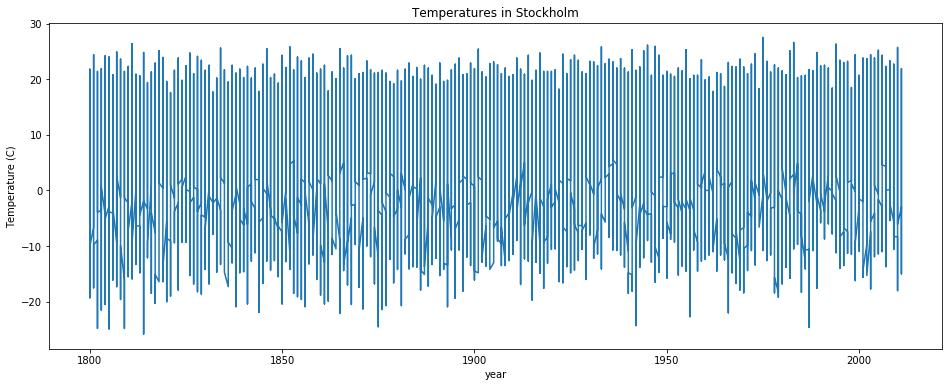

In [105]:
fig, ax = plt.subplots(figsize=(16,6))          # Create figure and axes (16 x 6 fig)
ax.plot(yrs, temps)                             # Asign yrs, temps to axes
ax.axis("normal")                               # Axis settings

# Set some labels
ax.set_title("Temperatures in Stockholm")
ax.set_xlabel("year")
ax.set_ylabel("Temperature (C)")

plt.show()                                      # Show the plot

### Exercise 12
Read in the file `daily_gas_price.csv`, which lists the daily price of natural gas since 1997. Each row contains a date and a price, separated by a comma. Find the minimum, maximum, and mean gas price over the dataset.

(Hint: you will need to use the delimiter option in `np.genfromtxt` to specify that data is separated by commas. Also, NumPy will interpret the data in float format by default - we may need to set the dtype to a string format at first, then discard the dates, before turning the gas prices back into floats to process them! Otherwise, NumPy may find it confusing to try and interpret dates formatted as YYYY-MM-DD as floats and will probably complain.)

In [133]:
data = np.genfromtxt("data/daily_gas_price.csv", delimiter = ",")

# Filter NAN's - not a number
data = data[1:,1]
data = data[~np.isnan(data)]

# print stats
print("Mean: ", data.mean())
print("Std : ", data.std())
print("Max : ", data.max())
print("Min : ", data.min())

Mean:  4.331772908366535
Std :  2.2031375976175553
Max :  18.48
Min :  1.05
